In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import kagglehub


## Data Loading
### Setup path to Kaggle Data and import the fraud detection datasets

In [90]:
path = kagglehub.dataset_download("kartik2112/fraud-detection")

## Data Import
### Define paths to training and test CSV files

In [91]:
fraud_test_csv = r"C:\Users\AdamKarner\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1\fraudTest.csv"
fraud_Train_csv = r"C:\Users\AdamKarner\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1\fraudTrain.csv"

### Load both training and test datasets into pandas DataFrames

In [92]:
fraud_test_df = pd.read_csv(fraud_test_csv)
fraud_train_df = pd.read_csv(fraud_Train_csv)

## Exploratory Data Analysis
### Check the basic statistics and information about the datasets

In [93]:
fraud_train_df.info()
fraud_train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [94]:
fraud_test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [95]:
# Identify column types
for column in fraud_train_df.columns:
    if fraud_train_df[column].dtype == 'object':
        print(f"\nColumn: {column}")
        print(f"Number of unique values: {fraud_train_df[column].nunique()}")
        print("Sample of unique values:")
        print(fraud_train_df[column].unique()[:5])

# Separate columns by type
categorical_columns = []
drop_columns = []
numerical_columns = []


Column: trans_date_trans_time
Number of unique values: 1274791
Sample of unique values:
['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51'
 '2019-01-01 00:01:16' '2019-01-01 00:03:06']

Column: merchant
Number of unique values: 693
Sample of unique values:
['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist']

Column: category
Number of unique values: 14
Sample of unique values:
['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos']

Column: first
Number of unique values: 352
Sample of unique values:
['Jennifer' 'Stephanie' 'Edward' 'Jeremy' 'Tyler']

Column: last
Number of unique values: 481
Sample of unique values:
['Banks' 'Gill' 'Sanchez' 'White' 'Garcia']

Column: gender
Number of unique values: 2
Sample of unique values:
['F' 'M']

Column: street
Number of unique values: 983
Sample of unique values:
['561 Perry Cove' '43039 Riley Greens Suite 393'
 '594 W

## Data Quality Check
### Check for any missing values in both training and test datasets

In [96]:
fraud_train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [97]:
fraud_test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [98]:
fraud_train_df.drop(['Unnamed: 0', 'cc_num', 'lat', 'long', 'first', 'last'], axis=1, inplace=True)

## Class Distribution Analysis
### Visualize the distribution of fraud vs. non-fraud cases in both datasets

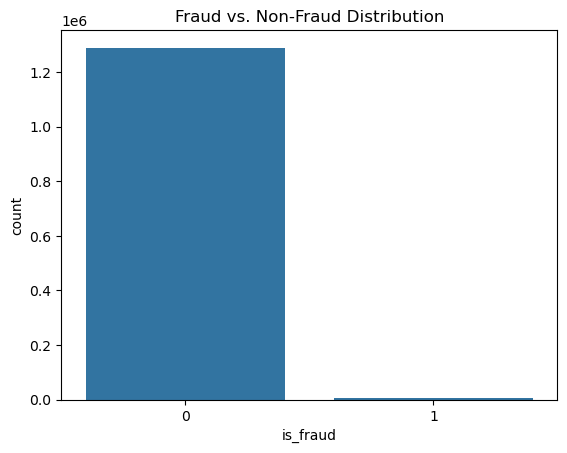

In [99]:
sns.countplot(x='is_fraud', data=fraud_train_df)
plt.title('Fraud vs. Non-Fraud Distribution')
plt.show()

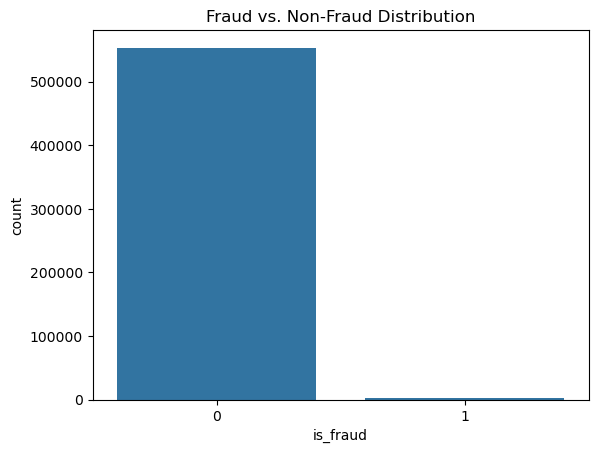

In [100]:
sns.countplot(x='is_fraud', data=fraud_test_df)
plt.title('Fraud vs. Non-Fraud Distribution')
plt.show()

## Feature Engineering
### First, we'll create time-based features from the transaction timestamps
### This will help us identify patterns in when fraud occurs

In [101]:
# Create time-based features
fraud_train_df['trans_date_trans_time'] = pd.to_datetime(fraud_train_df['trans_date_trans_time'])
fraud_test_df['trans_date_trans_time'] = pd.to_datetime(fraud_test_df['trans_date_trans_time'])

# Extract useful time features
def extract_time_features(df):
    # Basic time features (keeping existing ones)
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.day
    df['month'] = df['trans_date_trans_time'].dt.month
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    
    # Add new time features
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # Time of day categories (0: night, 1: morning, 2: afternoon, 3: evening)
    df['time_period'] = pd.cut(df['hour'], 
                              bins=[-1, 6, 12, 18, 24], 
                              labels=[0, 1, 2, 3])
    
    # Is it business hours (9 AM to 5 PM)
    df['is_business_hours'] = df['hour'].between(9, 17).astype(int)
    
    return df

fraud_train_df = extract_time_features(fraud_train_df)
fraud_test_df = extract_time_features(fraud_test_df)

## Temporal Analysis
### Let's visualize when fraud is most likely to occur:
- By hour of the day
- By day of the week
- By month
### This can help identify patterns in fraudulent activity

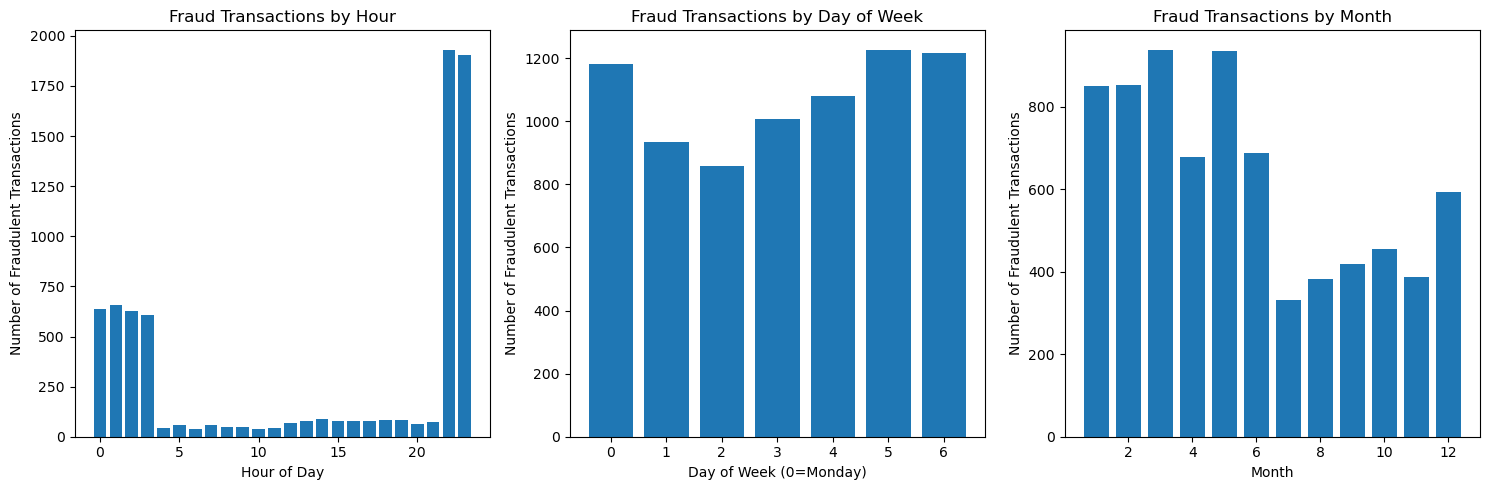

In [102]:
# Visualize time-based patterns
plt.figure(figsize=(15, 5))

# Fraud by hour
plt.subplot(1, 3, 1)
fraud_by_hour = fraud_train_df[fraud_train_df['is_fraud'] == 1]['hour'].value_counts().sort_index()
plt.bar(fraud_by_hour.index, fraud_by_hour.values)
plt.title('Fraud Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')

# Fraud by day of week
plt.subplot(1, 3, 2)
fraud_by_dow = fraud_train_df[fraud_train_df['is_fraud'] == 1]['day_of_week'].value_counts().sort_index()
plt.bar(fraud_by_dow.index, fraud_by_dow.values)
plt.title('Fraud Transactions by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Number of Fraudulent Transactions')

# Fraud by month
plt.subplot(1, 3, 3)
fraud_by_month = fraud_train_df[fraud_train_df['is_fraud'] == 1]['month'].value_counts().sort_index()
plt.bar(fraud_by_month.index, fraud_by_month.values)
plt.title('Fraud Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')

plt.tight_layout()
plt.show()

### Examining fraud patterns across broader time-based features:
- Time periods (night/morning/afternoon/evening)
- Weekend vs Weekday
- Business Hours vs Non-Business Hours

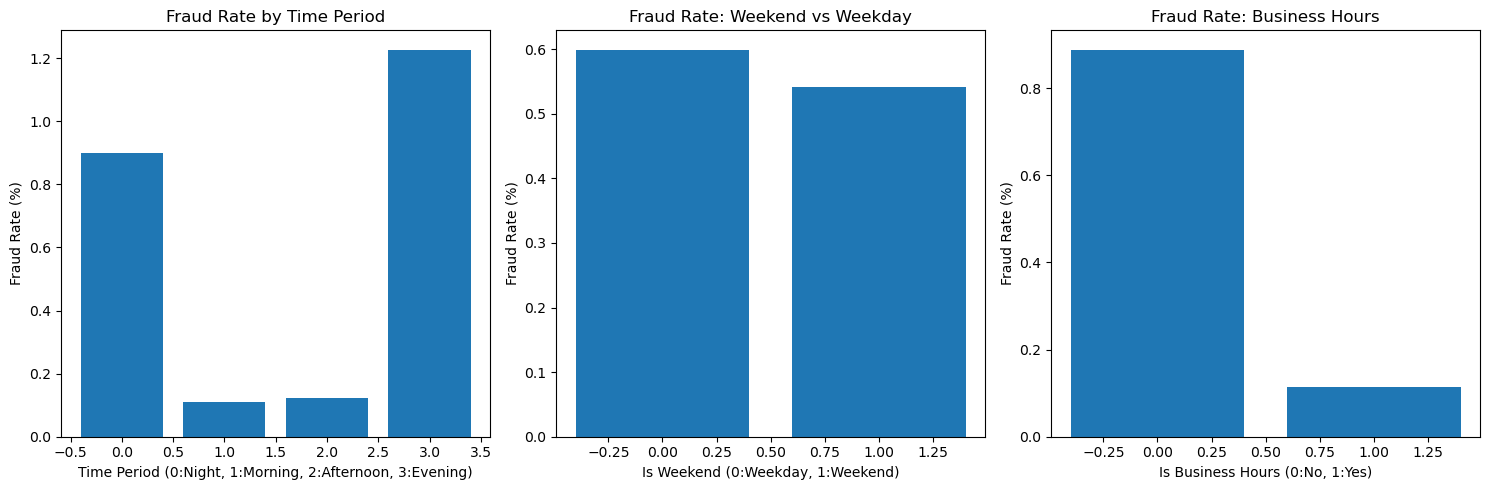

In [103]:
# Create a figure for new time feature visualizations
plt.figure(figsize=(15, 5))

# Fraud by time period
plt.subplot(1, 3, 1)
fraud_by_period = pd.crosstab(fraud_train_df['time_period'], 
                             fraud_train_df['is_fraud'], 
                             normalize='index') * 100
plt.bar(fraud_by_period.index, fraud_by_period[1])  # Using 1 for fraud cases
plt.title('Fraud Rate by Time Period')
plt.xlabel('Time Period (0:Night, 1:Morning, 2:Afternoon, 3:Evening)')
plt.ylabel('Fraud Rate (%)')

# Fraud by weekend/weekday
plt.subplot(1, 3, 2)
fraud_by_weekend = pd.crosstab(fraud_train_df['is_weekend'], 
                              fraud_train_df['is_fraud'], 
                              normalize='index') * 100
plt.bar(fraud_by_weekend.index, fraud_by_weekend[1])  # Using 1 for fraud cases
plt.title('Fraud Rate: Weekend vs Weekday')
plt.xlabel('Is Weekend (0:Weekday, 1:Weekend)')
plt.ylabel('Fraud Rate (%)')

# Fraud by business hours
plt.subplot(1, 3, 3)
fraud_by_biz_hours = pd.crosstab(fraud_train_df['is_business_hours'], 
                                fraud_train_df['is_fraud'], 
                                normalize='index') * 100
plt.bar(fraud_by_biz_hours.index, fraud_by_biz_hours[1])  # Using 1 for fraud cases
plt.title('Fraud Rate: Business Hours')
plt.xlabel('Is Business Hours (0:No, 1:Yes)')
plt.ylabel('Fraud Rate (%)')

plt.tight_layout()
plt.show()

### Combined Time Pattern Analysis
Looking at the interaction between different time features

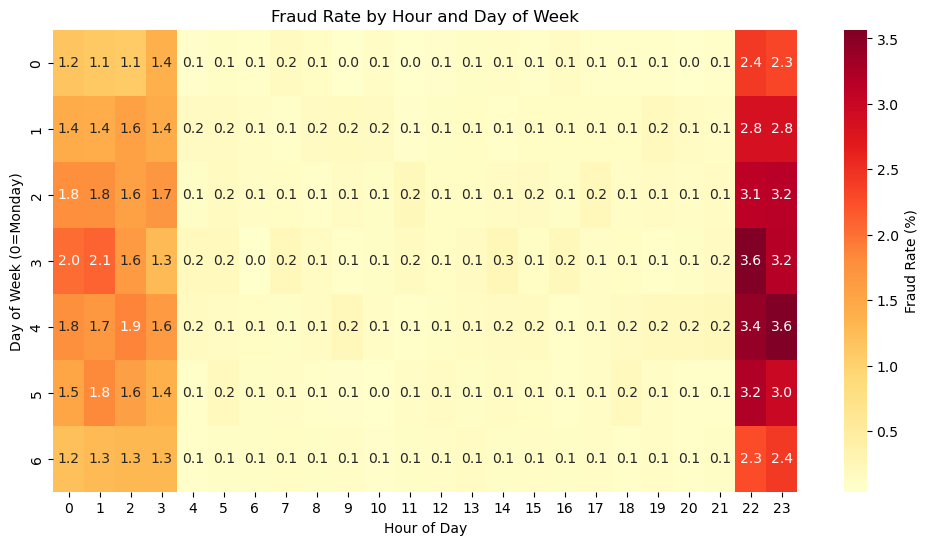

In [104]:
# Create heatmap of fraud rates by hour and day of week
plt.figure(figsize=(12, 6))
fraud_pivot = pd.pivot_table(fraud_train_df, 
                            values='is_fraud',
                            index='day_of_week',
                            columns='hour',
                            aggfunc='mean') * 100

sns.heatmap(fraud_pivot, 
            cmap='YlOrRd',
            annot=True, 
            fmt='.1f',
            cbar_kws={'label': 'Fraud Rate (%)'})
plt.title('Fraud Rate by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday)')
plt.show()

In [105]:
# Statistical summary of fraud rates across time features
print("\nAverage Fraud Rate by Time Period:")
print(fraud_train_df.groupby('time_period')['is_fraud'].mean().mul(100).round(2))

print("\nAverage Fraud Rate by Day Type:")
print(fraud_train_df.groupby('is_weekend')['is_fraud'].mean().mul(100).round(2))

print("\nAverage Fraud Rate by Business Hours:")
print(fraud_train_df.groupby('is_business_hours')['is_fraud'].mean().mul(100).round(2))


Average Fraud Rate by Time Period:
time_period
0    0.90
1    0.11
2    0.12
3    1.23
Name: is_fraud, dtype: float64

Average Fraud Rate by Day Type:
is_weekend
0    0.60
1    0.54
Name: is_fraud, dtype: float64

Average Fraud Rate by Business Hours:
is_business_hours
0    0.89
1    0.11
Name: is_fraud, dtype: float64


C:\Users\AdamKarner\AppData\Local\Temp\ipykernel_18796\3169172832.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(fraud_train_df.groupby('time_period')['is_fraud'].mean().mul(100).round(2))


## Transaction Amount Analysis
### Analyzing the distribution of transaction amounts for both fraudulent and legitimate transactions
### This can help identify if fraudulent transactions have different amount patterns

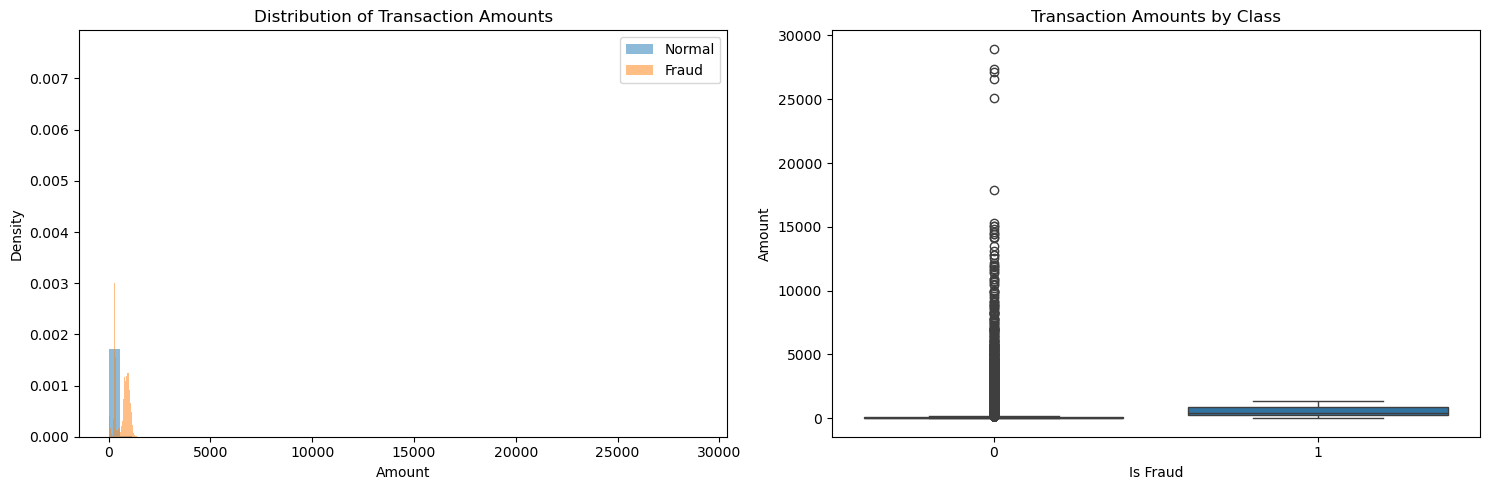

In [106]:
# Analyze transaction amounts
plt.figure(figsize=(15, 5))

# Distribution of transaction amounts
plt.subplot(1, 2, 1)
plt.hist(fraud_train_df[fraud_train_df['is_fraud'] == 0]['amt'].values, 
         bins=50, alpha=0.5, label='Normal', density=True)
plt.hist(fraud_train_df[fraud_train_df['is_fraud'] == 1]['amt'].values, 
         bins=50, alpha=0.5, label='Fraud', density=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()

# Box plot of amounts by fraud/non-fraud
plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='amt', data=fraud_train_df)
plt.title('Transaction Amounts by Class')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


## Data Preprocessing
1. One-hot encode categorical variables (merchant, category, gender, state)
2. Ensure test set has same columns as training set
3. Handle any missing columns in test set
### This prepares our data for the machine learning model

In [107]:
# Prepare features for modeling
drop_columns = ['first', 'last', 'trans_date_trans_time', 'street']
# One-hot encode categorical variables
categorical_columns = ['merchant', 'category', 'gender', 'state']
fraud_train_encoded = pd.get_dummies(fraud_train_df, columns=categorical_columns)
fraud_test_encoded = pd.get_dummies(fraud_test_df, columns=categorical_columns)

# Ensure test set has same columns as training set
missing_cols = set(fraud_train_encoded.columns) - set(fraud_test_encoded.columns)
for col in missing_cols:
    fraud_test_encoded[col] = 0

# Align columns
fraud_test_encoded = fraud_test_encoded[fraud_train_encoded.columns]


## Feature Selection and Scaling
1. Select relevant features for modeling
2. Scale numerical features using StandardScaler
### This ensures all features are on the same scale and properly prepared for the model

In [108]:
# Drop datetime and unnecessary columns first
drop_columns = ['trans_date_trans_time', 'street']
fraud_train_encoded = fraud_train_encoded.drop(columns=drop_columns)
fraud_test_encoded = fraud_test_encoded.drop(columns=drop_columns)

# Select features for modeling
feature_columns = [col for col in fraud_train_encoded.columns 
                  if col not in ['is_fraud']]

X = fraud_train_encoded[feature_columns].copy()
y = fraud_train_encoded['is_fraud']

X_test = fraud_test_encoded[feature_columns].copy()
y_test = fraud_test_encoded['is_fraud']

# Convert any remaining object dtypes to numeric
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Fill any NaN values that might have been created
X = X.fillna(0)
X_test = X_test.fillna(0)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['amt', 'hour', 'day', 'month', 'day_of_week', 
                     'is_weekend', 'time_period', 'is_business_hours']
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [109]:
X_train.shape

(1037340, 785)

## Model Training
1. Split training data into train and validation sets
2. Train Random Forest Classifier
3. Make predictions on validation and test sets

In [111]:
# Split training data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

TypeError: Cannot cast DatetimeArray to dtype float32

## Model Evaluation
### Evaluate model performance using:
1. Classification Report (Precision, Recall, F1-Score)
2. Confusion Matrix
### This helps us understand how well our model is performing at detecting fraud

In [ ]:
# Print classification reports
print("\nValidation Set Performance:")
print(classification_report(y_val, y_val_pred))

print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))

## Confusion Matrix Visualization
### Visualize model performance using confusion matrices for both validation and test sets
### This shows us:
- True Negatives (correct normal transaction predictions)
- False Positives (incorrect fraud predictions)
- False Negatives (missed fraud cases)
- True Positives (correct fraud predictions)

In [ ]:
# Create confusion matrix visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## Feature Importance Analysis
### Identify which features are most important for fraud detection
### This can help us understand what factors are most indicative of fraudulent transactions

In [ ]:
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()